# Exploratory Data Analysis using Python

Dataset contains information about restaurants in Bangalore working with Zomato.<br>

Following task will be performed on the data:<br>
1) Data Cleaning<br>
2) Data Visualization<br>


## 1) Data Cleaning

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

### Read Data

In [2]:
zomato = pd.read_csv(r'C:\Users\patil\Desktop\Project 1\zomato.csv\zomato.csv')
zomato.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


### Delete unnecessary columns

In [3]:
zomato.drop(columns = ['url','address','phone','dish_liked','reviews_list','menu_item'],inplace=True)

In [4]:
zomato.head(1)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari


### Renaming Columns

In [5]:
zomato.rename(columns = {'name':'restaurant'
                        ,'rate':'rating'
                        ,'approx_cost(for two people)':'cost'
                        ,'listed_in(type)':'type'
                        ,'listed_in(city)':'city'
                        },inplace=True)

In [6]:
zomato.head(1)

,restaurant,online_order,book_table,rating,votes,location,rest_type,cuisines,cost,type,city
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari


### Dropping NaN values

In [7]:
zomato.isna().value_counts()

restaurant  online_order  book_table  rating  votes  location  rest_type  cuisines  cost   type   city 
False       False         False       False   False  False     False      False     False  False  False    43533
                                      True    False  False     False      False     False  False  False     7615
                                      False   False  False     False      False     True   False  False      247
                                                               True       False     False  False  False      149
                                      True    False  False     False      False     True   False  False       71
                                                               True       False     False  False  False       55
                                                     True      True       True      True   False  False       21
                                                     False     False      True      False  False  False  

In [8]:
zomato.dropna(inplace=True)

In [9]:
zomato.isna().value_counts()

restaurant  online_order  book_table  rating  votes  location  rest_type  cuisines  cost   type   city 
False       False         False       False   False  False     False      False     False  False  False    43533
dtype: int64

### Cleaning Individual Columns

Cleaning column *restaurant* : replace disturbed characters

In [10]:
zomato['restaurant'].unique()

array(['Jalsa', 'Spice Elephant', 'San Churro Cafe', ...,
       'The Nest - The Den Bengaluru', 'Nawabs Empire',
       'SeeYa Restaurant'], dtype=object)

In [11]:
zomato['restaurant'] = zomato['restaurant'].str.replace('[Ã][^C]+','',regex=True)

In [12]:
zomato['restaurant'].unique()

array(['Jalsa', 'Spice Elephant', 'San Churro Cafe', ...,
       'The Nest - The Den Bengaluru', 'Nawabs Empire',
       'SeeYa Restaurant'], dtype=object)

Check column *online_order*

In [13]:
zomato['online_order'].unique()

array(['Yes', 'No'], dtype=object)

Check column *book_table*

In [14]:
zomato['book_table'].unique()

array(['Yes', 'No'], dtype=object)

Check column *rating* : removing /5 (out of 5) value ,replace NEW with '-' (dash), change datatype to float

In [15]:
zomato['rating'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [16]:
replace = lambda x: x.replace('/5',"")
list = []
for a in map(replace,zomato['rating']):
    if a!='NEW' and a!='-':
        var = float(a)
    list.append(var)
zomato['rating']=list

In [17]:
zomato['rating'].dtype

dtype('float64')

Check column *votes*

In [18]:
zomato['votes'].isnull().value_counts()

False    43533
Name: votes, dtype: int64

Check column *location*

In [19]:
zomato['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
       'CV Raman Nagar', 'Electronic City', 'Wilson Garden',
       'Shanti Nagar', 'Koramangala 5th Block', 'Richmond Road', 'HSR',
       'Marathahalli', 'Koramangala 7th Block', 'Bellandur',
       'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'MG Road', 'Brigade Road', 'Lavelle Road',
       'Church Street', 'Ulsoor', 'Residency Road', 'Shivajinagar',
       'Infantry Road', 'St. Marks Road', 'Cunningham Road',
       'Race Course Road', 'Commercial Street', 'Vasanth Nagar', 'Domlur',
       'Koramangala 8th Block', 'Ejipura', 'Jeevan Bhima Nagar',
       'Old Madras Road', 'Seshadripuram', 'Kammanahalli',
       'Koramanga

Check column *rest_type*

In [20]:
zomato['rest_type'].isnull().value_counts(),zomato['rest_type'].unique()

(False    43533
 Name: rest_type, dtype: int64,
 array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
        'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
        'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
        'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
        'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
        'Dessert Parlor, Sweet Shop', 'Bakery, Quick Bites',
        'Sweet Shop, Quick Bites', 'Kiosk', 'Food Truck',
        'Quick Bites, Dessert Parlor', 'Beverage Shop, Quick Bites',
        'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
        'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
        'Quick Bites, Bakery', 'Microbrewery, Casual Dining', 'Lounge',
        'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery', 'Dhaba',
        'Quick Bites, Sweet Shop', 'Microbrewery',
        'Food Court, Quick Bites', 'Quick Bites, Beverage Shop',
        'Pub, Bar', 'Casual Dining, Pub', 'Lo

Check column *cuisines*

In [21]:
zomato['cuisines'].isnull().value_counts(),zomato['cuisines'].unique()

(False    43533
 Name: cuisines, dtype: int64,
 array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
        'Cafe, Mexican, Italian', ..., 'Tibetan, Nepalese',
        'North Indian, Street Food, Biryani',
        'North Indian, Chinese, Arabian, Momos'], dtype=object))

Check column *cost* : column needs to be cleaned for comma and then data type to be converted into int

In [22]:
zomato['cost'].isnull().value_counts(),zomato['cost'].unique()

(False    43533
 Name: cost, dtype: int64,
 array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
        '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
        '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
        '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
        '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
        '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
        '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
        '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
        '4,500'], dtype=object))

In [23]:
zomato['cost'] = zomato['cost'].apply(lambda x:x.replace(',','')).astype(int)

In [24]:
zomato['cost'].isnull().value_counts(),zomato['cost'].unique()

(False    43533
 Name: cost, dtype: int64,
 array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  900,  200,
         750,  150,  850,  100, 1200,  350,  250,  950, 1000, 1500, 1300,
         199,   80, 1100,  160, 1600,  230,  130, 1700, 1400, 1350, 2200,
        2000, 1800, 1900,  180,  330, 2500, 2100, 3000, 2800, 3400,   50,
          40, 1250, 3500, 4000, 2400, 2600, 1450,   70, 3200,  560,  240,
         360, 6000, 1050, 2300, 4100,  120, 5000, 3700, 1650, 2700, 4500]))

Check column *type*

In [25]:
zomato['type'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

Check column *city*

In [26]:
zomato['city'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

### Droppping duplicate values

In [27]:
zomato.duplicated().value_counts()

False    43453
True        80
dtype: int64

We can see there are 80 duplicate values. We will delete the duplicates and keep the latest entries

In [28]:
zomato.drop_duplicates(keep='last',inplace=True)

In [29]:
zomato.duplicated().value_counts()

False    43453
dtype: int64

In [30]:
zomato

,restaurant,online_order,book_table,rating,votes,location,rest_type,cuisines,cost,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51709,The Farm House Bar n Grill,No,No,3.7,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800,Pubs and bars,Whitefield
51711,Bhagini,No,No,2.5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800,Pubs and bars,Whitefield
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,Continental,1500,Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2500,Pubs and bars,Whitefield


In [31]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43453 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   restaurant    43453 non-null  object 
 1   online_order  43453 non-null  object 
 2   book_table    43453 non-null  object 
 3   rating        43453 non-null  float64
 4   votes         43453 non-null  int64  
 5   location      43453 non-null  object 
 6   rest_type     43453 non-null  object 
 7   cuisines      43453 non-null  object 
 8   cost          43453 non-null  int32  
 9   type          43453 non-null  object 
 10  city          43453 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(8)
memory usage: 3.8+ MB


In [32]:
zomato.to_csv(r'C:\Users\patil\Desktop\Project 1\zomato_cleaned.csv')

In [33]:
zomato

,restaurant,online_order,book_table,rating,votes,location,rest_type,cuisines,cost,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51709,The Farm House Bar n Grill,No,No,3.7,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800,Pubs and bars,Whitefield
51711,Bhagini,No,No,2.5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800,Pubs and bars,Whitefield
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,Continental,1500,Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2500,Pubs and bars,Whitefield


## 2) Data Visualisation


* Table showing number of restaurants who provide service like online order and table booking

In [34]:
col1 = ['city','online_order']
col2 = ['city','book_table']

tab1 = zomato[col1]
tab2 = zomato[col2]

tab_1 = tab1.groupby('city')['online_order'].value_counts(normalize=True).to_frame(name='online_order_acceptance')
tab_1['online_order_acceptance'] = round(tab_1['online_order_acceptance'],4)*100
tab_1 = tab_1.filter(like='Yes',axis=0)
tab_1.reset_index(inplace=True)
tab_1 = tab_1.drop(['online_order'],axis=1)

tab_2 = tab2.groupby('city')['book_table'].value_counts(normalize=True).to_frame(name='book_table_acceptance')
tab_2['book_table_acceptance'] = round(tab_2['book_table_acceptance'],4)*100
tab_2 = tab_2.filter(like='Yes',axis=0)
tab_2.reset_index(inplace=True)
tab_2 = tab_2.drop(['book_table'],axis=1)

In [35]:
tab_1.set_index('city')

,online_order_acceptance
city,
BTM,70.87
Banashankari,68.80
Bannerghatta Road,69.92
Basavanagudi,66.58
Bellandur,72.71
Brigade Road,54.49
Brookefield,70.24
Church Street,51.38
Electronic City,55.86


In [36]:
tab_2.set_index('city')

,book_table_acceptance
city,
BTM,13.77
Banashankari,5.48
Bannerghatta Road,8.84
Basavanagudi,10.79
Bellandur,12.96
Brigade Road,22.72
Brookefield,9.92
Church Street,22.99
Electronic City,10.13


In [37]:
tab_comb = tab_1.merge(tab_2,how='outer',on='city')

In [38]:
tab_comb

,city,online_order_acceptance,book_table_acceptance
0,BTM,70.87,13.77
1,Banashankari,68.80,5.48
2,Bannerghatta Road,69.92,8.84
3,Basavanagudi,66.58,10.79
4,Bellandur,72.71,12.96
5,Brigade Road,54.49,22.72
6,Brookefield,70.24,9.92
7,Church Street,51.38,22.99
8,Electronic City,55.86,10.13
9,Frazer Town,66.16,12.99


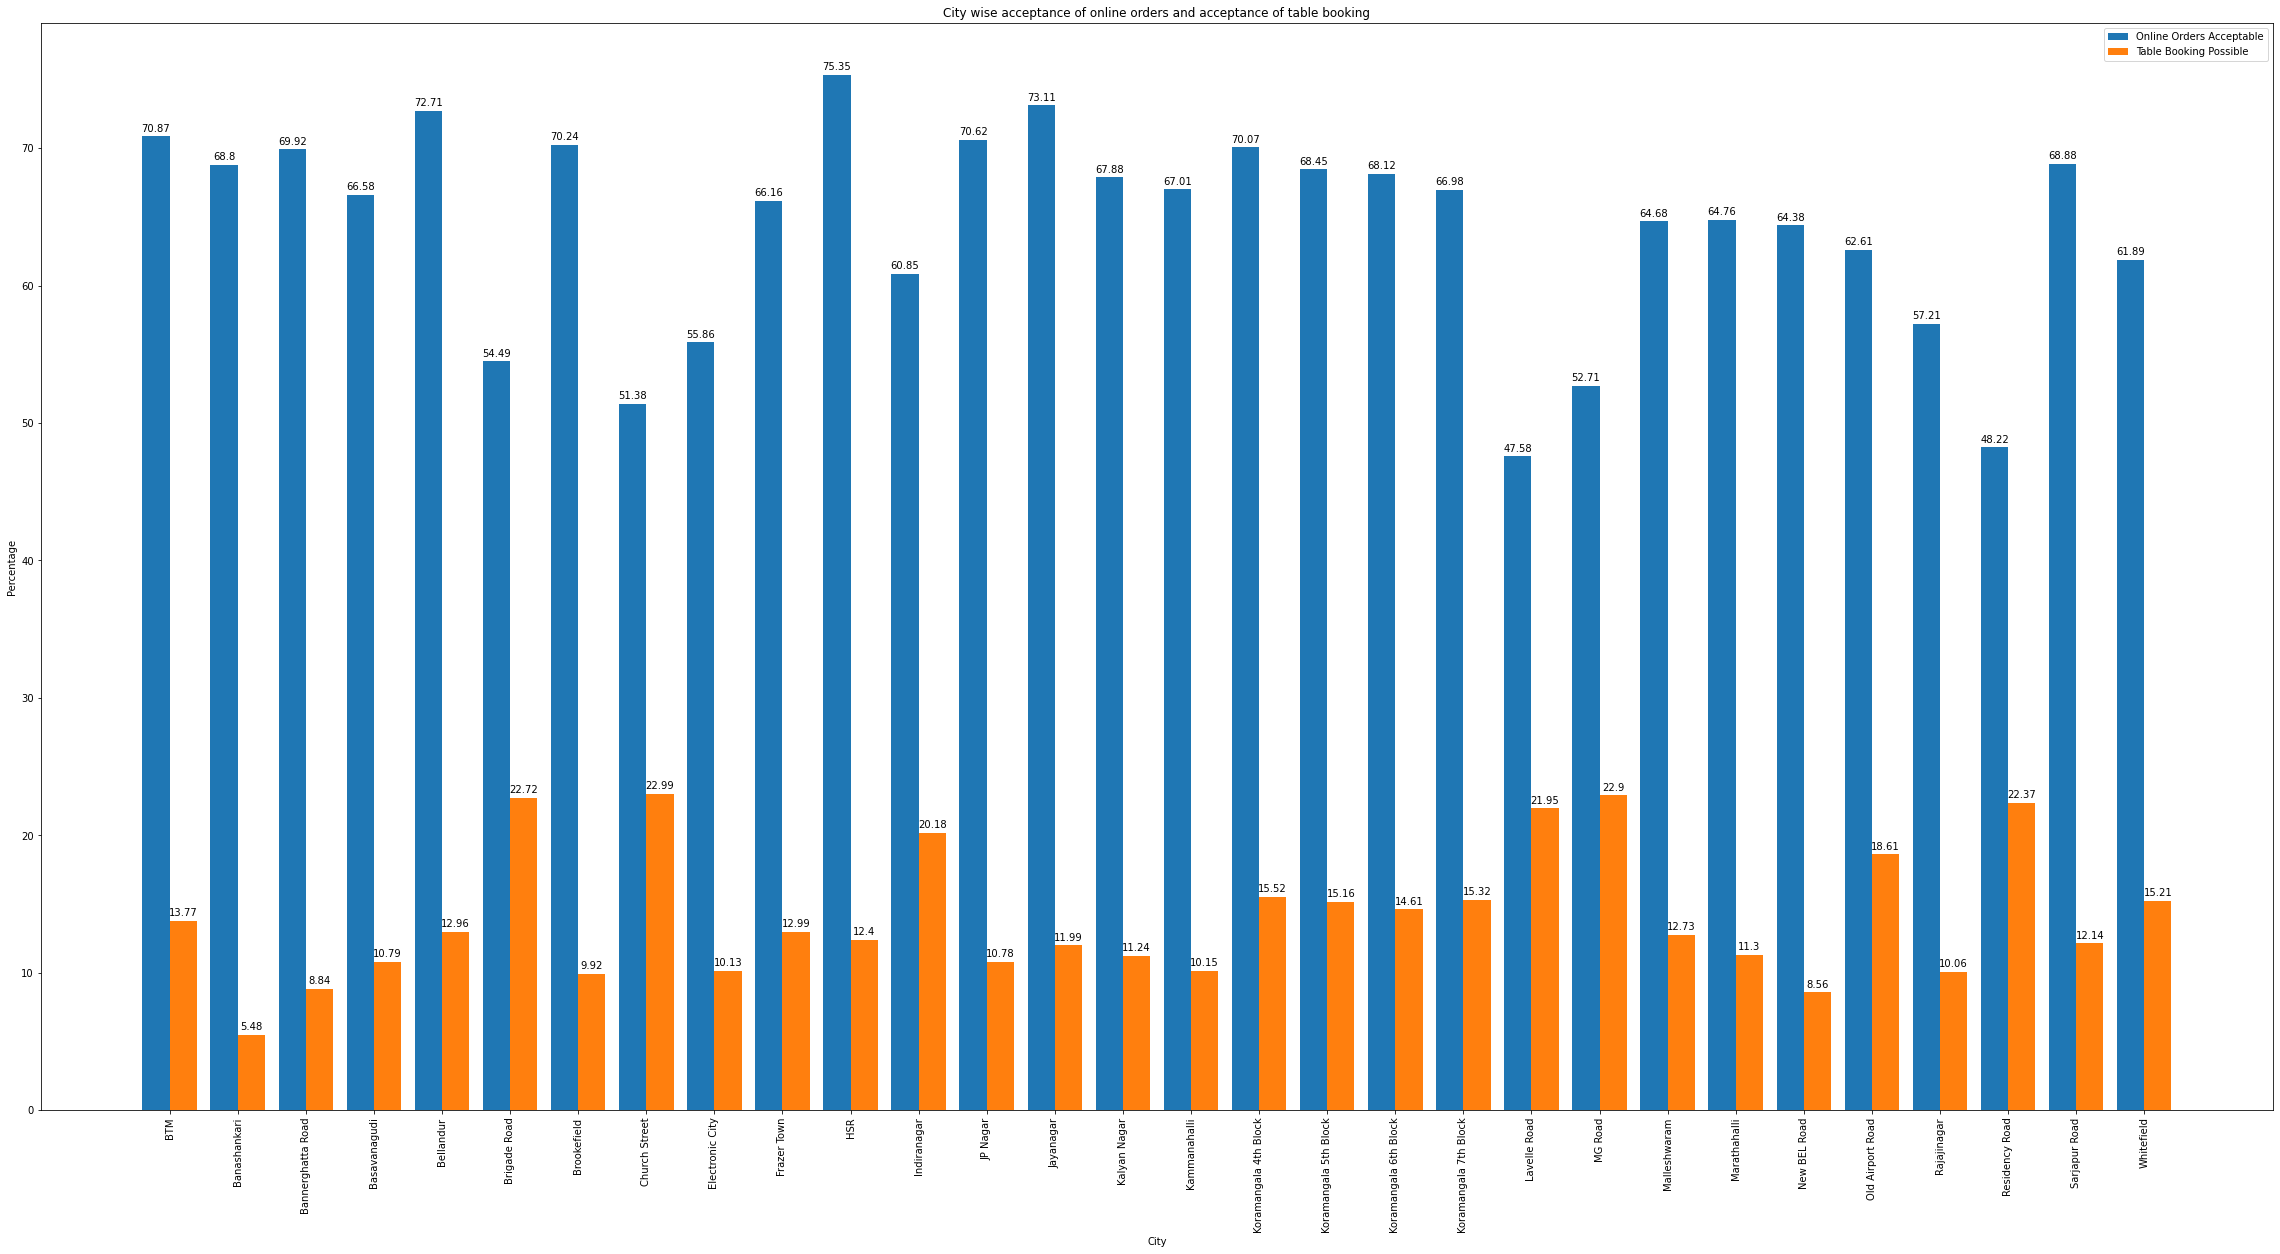

In [49]:
x = tab_comb['city']
y = tab_comb['online_order_acceptance']
z = tab_comb['book_table_acceptance']

length = np.arange(len(x))
width = 0.4

plt.rcParams["figure.figsize"] = [40,20]
fig,ax = plt.subplots()

online = ax.bar(length-width/2,y,width,label='Online Orders Acceptable',linewidth=20)
table = ax.bar(length+width/2,z,width,label='Table Booking Possible',linewidth=20)

ax.set_ylabel('Percentage')
ax.set_xlabel('City')
ax.set_title('City wise acceptance of online orders and acceptance of table booking')
ax.set_xticks(length,x)
plt.xticks(rotation=90)
ax.legend()

ax.bar_label(online,padding=3)
ax.bar_label(table,padding=3)

plt.show()

* Best location based on rating and votes

In [40]:
columns2 = ['location','votes','rating']
bestloc = zomato[columns2]
bestloc = bestloc.groupby('location').agg({'votes':'sum','rating':'mean'})
bestloc.reset_index(inplace=True)

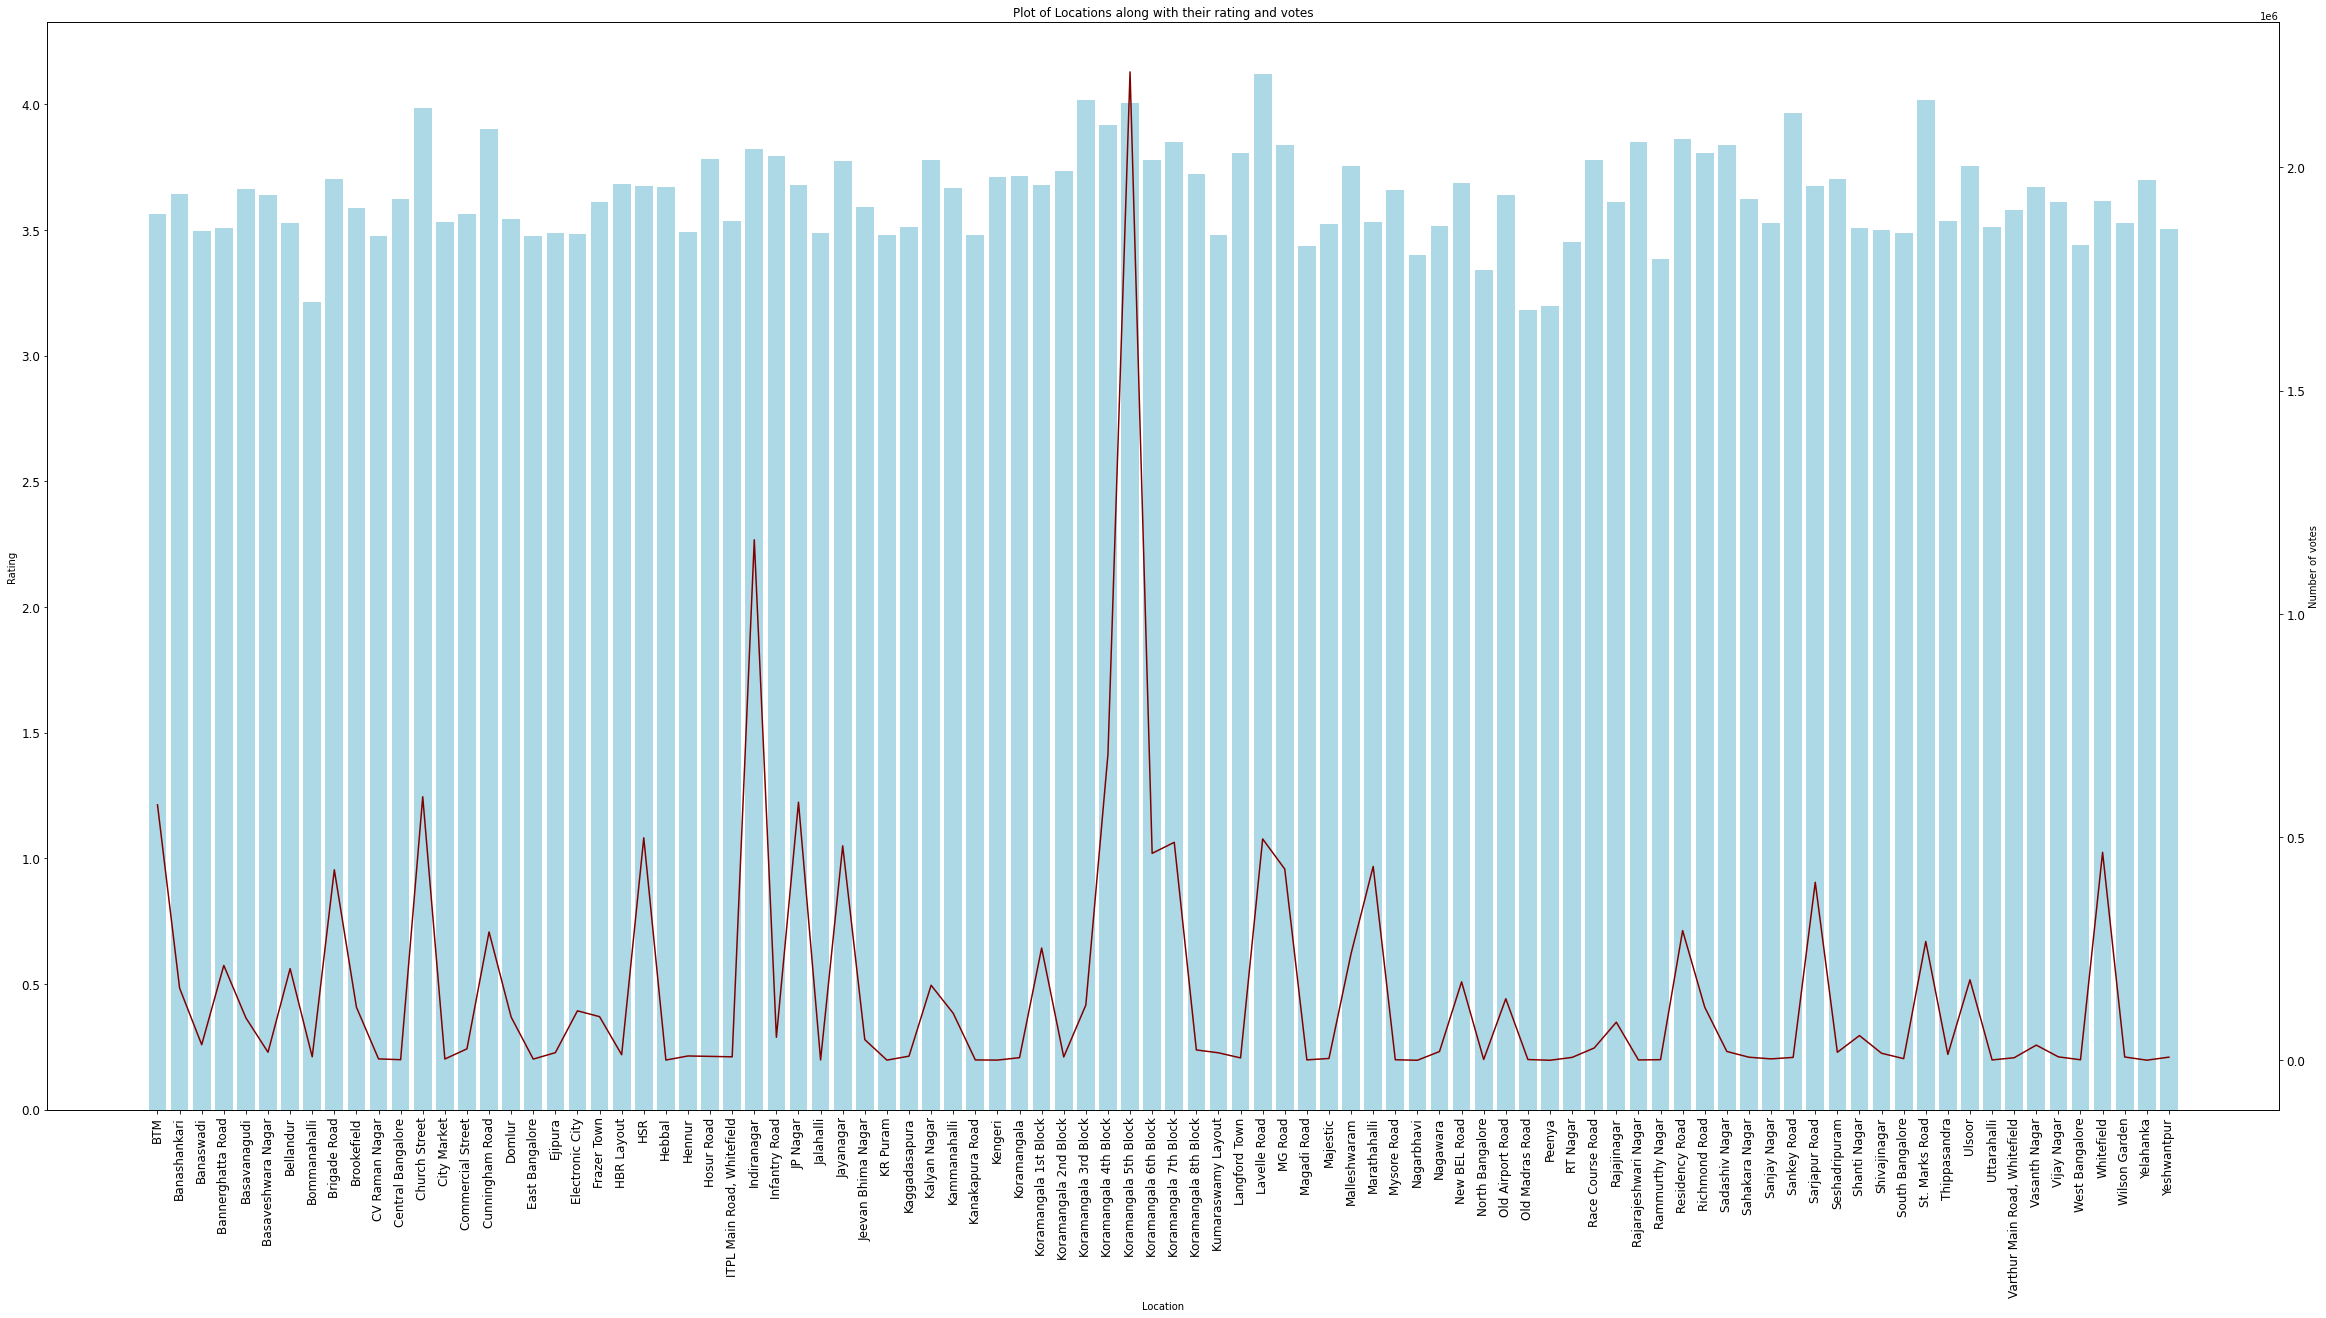

In [41]:
x = bestloc['location']
y = bestloc['votes']
z = bestloc['rating']

plt.rcParams["figure.figsize"] = [40,20]
fig,ax1 = plt.subplots()
ax1.bar(x,z,color='#ADD8E6')
ax1.set_xlabel('Location',loc='center')
ax1.set_ylabel('Rating',loc='center')
ax1.set_title('Plot of Locations along with their rating and votes')
ax1.tick_params(labelsize=12)
plt.xticks(rotation=90)
ax2=ax1.twinx()
ax2.plot(x,y,color="#800000")
ax2.set_ylabel('Number of votes',loc='center')
ax2.tick_params(labelsize=12)

plt.show()

* Type of restaurants and their counts

In [42]:
column3 = ['type']
typeofres = zomato[column3]
typeofres = typeofres.groupby('type').value_counts().to_frame(name='total_restaurants')
typeofres.reset_index(inplace=True)

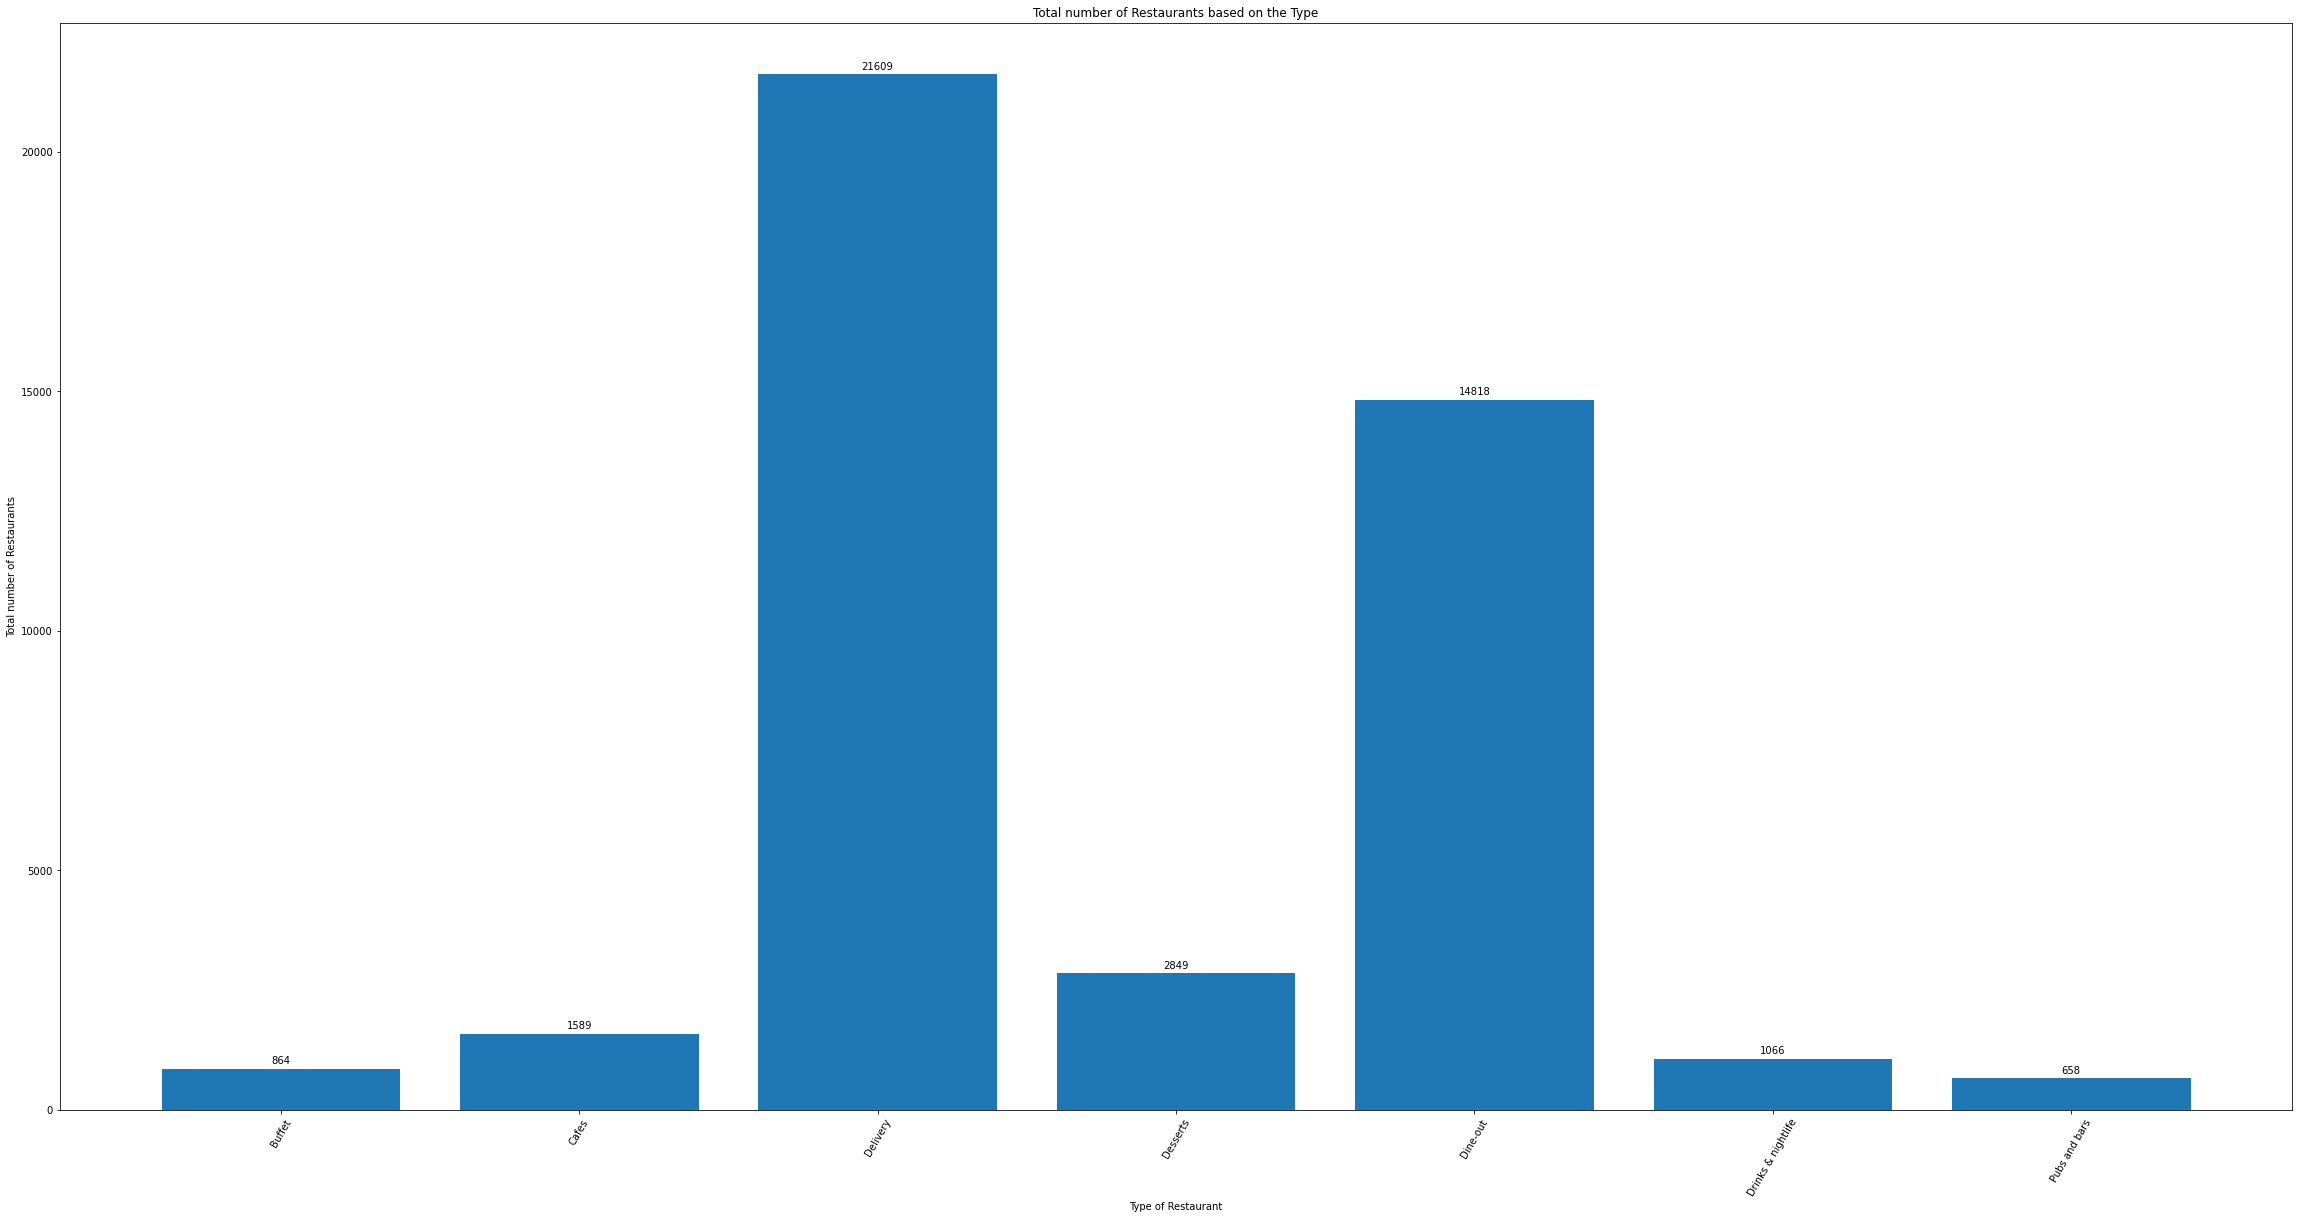

In [43]:
x = typeofres['type']
y = typeofres['total_restaurants']

fig,ax = plt.subplots()
plt.rcParams["figure.figsize"]=[9,6]
aa = ax.bar(x,y)
ax.set_xlabel('Type of Restaurant')
ax.set_ylabel('Total number of Restaurants')
ax.set_title('Total number of Restaurants based on the Type')
ax.bar_label(aa,padding=3)
plt.xticks(rotation=60)
plt.show()

* Gaussian / Normal Distribution of Rating

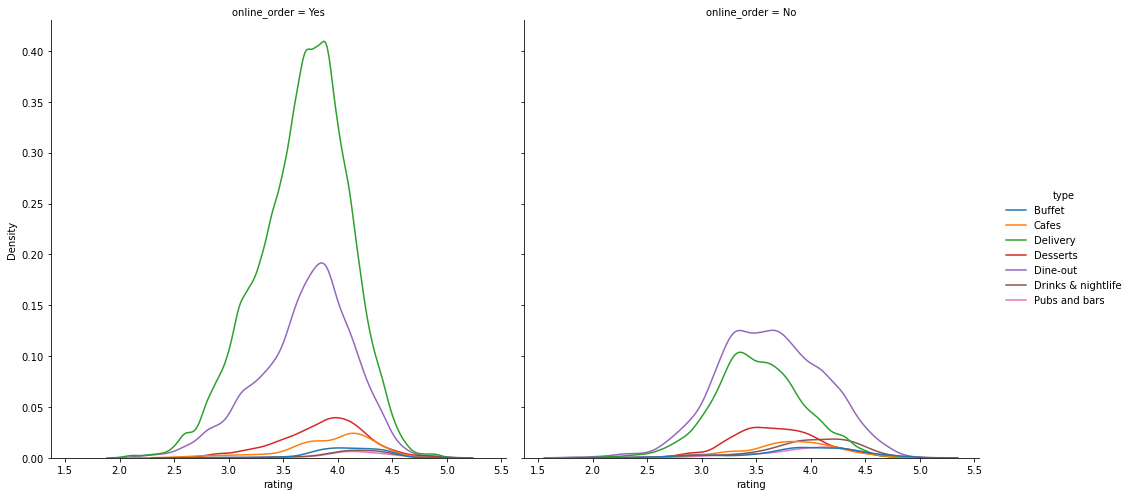

In [44]:
sns.displot(data=zomato,x='rating',kind='kde',hue='type',col='online_order',height=7)

* Restaurant chains and their total restaurants

In [45]:
column3 = ['restaurant']
chains = zomato[column3]
chains = chains.groupby('restaurant').value_counts().to_frame(name='number_of_outlets')
chains.reset_index(inplace=True)

In [46]:
chain = chains.sort_values(by='number_of_outlets',ascending=False).head(20)

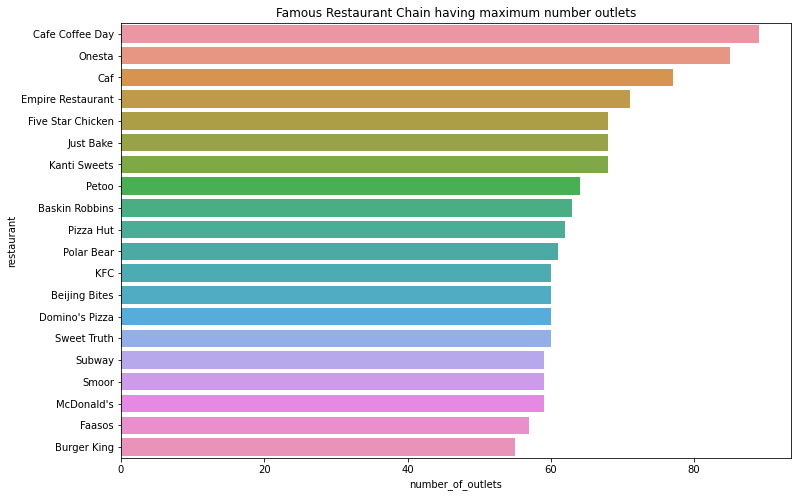

In [47]:
x = chain['restaurant']
y = chain['number_of_outlets']

plt.figure(figsize=(12,8))
aaaa = sns.barplot(y=x,x=y,orient='h')
plt.title('Famous Restaurant Chain having maximum number outlets')
plt.show()